In [1]:
import rioxarray

In [2]:
import pystac #for working with a locally saved pystac object

In [6]:
items=pystac.ItemCollection.from_file("search.json")
items

id: S2A_31UFU_20200328_0_L2A
"bbox: [4.814996623122647, 52.22257539160586, 6.1417542968794585, 53.228577890548]"
datetime: 2020-03-28T10:46:21Z
platform: sentinel-2a
constellation: sentinel-2
instruments: ['msi']
gsd: 10
view:off_nadir: 0
proj:epsg: 32631
sentinel:utm_zone: 31
sentinel:latitude_band: U


In [19]:
item=items[0]
item.assets.keys()

dict_keys(['thumbnail', 'overview', 'info', 'metadata', 'visual', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL'])

In [18]:
b09_href=item.assets["B09"].href

In [9]:
b09=rioxarray.open_rasterio(b09_href)
b09

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [10]:
b09.coords["spatial_ref"]

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int32 0
Attributes: (12/18)
    crs_wkt:                           PROJCS["WGS 84 / UTM zone 31N",GEOGCS[...
    semi_major_axis:                   6378137.0
    semi_minor_axis:                   6356752.314245179
    inverse_flattening:                298.257223563
    reference_ellipsoid_name:          WGS 84
    longitude_of_prime_meridian:       0.0
    ...                                ...
    longitude_of_central_meridian:     3.0
    false_easting:                     500000.0
    false_northing:                    0.0
    scale_factor_at_central_meridian:  0.9996
    spatial_ref:                       PROJCS["WGS 84 / UTM zone 31N",GEOGCS[...
    GeoTransform:                      600000.0 60.0 0.0 5900040.0 0.0 -60.0

In [11]:
b09.rio.crs

CRS.from_epsg(32631)

In [12]:
b09.rio.nodata

0

In [13]:
b09.rio.bounds()

(600000.0, 5790240.0, 709800.0, 5900040.0)

In [14]:
b09.values

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

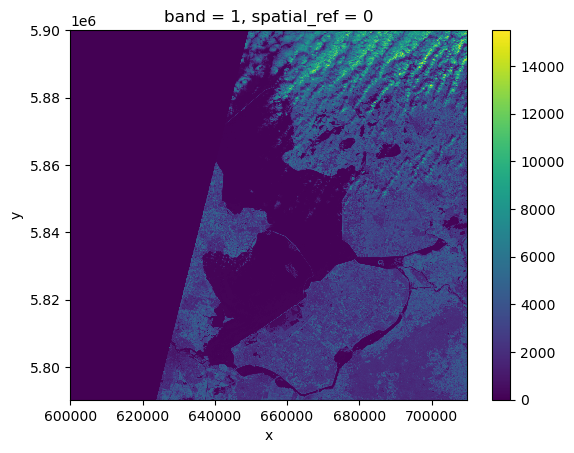

In [15]:
b09.plot()

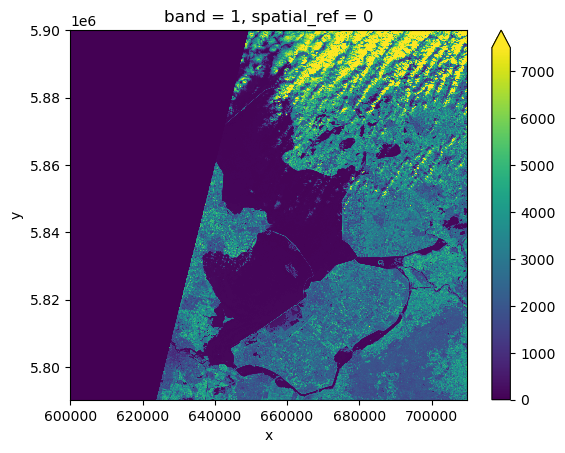

In [16]:
b09.plot(robust=True)

In [20]:
# Type of CRS object
type(b09.rio.crs)

rasterio.crs.CRS

In [24]:
b09_epsg = b09.rio.crs.to_epsg()


In [25]:
from pyproj import CRS


In [28]:
b09_repr=b09.rio.reproject("EPSG:4326")

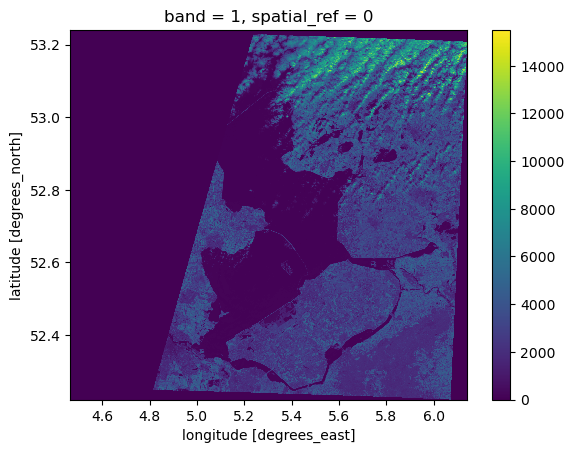

In [29]:
b09_repr.plot()